## Coursera
### Wesleyan University Data Analysis and Interpretation Specialization

Course 3: Regression Modeling in Practice<br>
Week 3: Test a Multiple Regression Model<br>
Author: Matt Clark

### Introduction:

This weeks task is to run a regression of multiple explanatory variables against a single response variable, which is to be quantitative (or multiply leveled categorical, in our case). As is usual, we will use the Outlook On Life data set, and our response variable will be our respondents' Economic Optimism, as measured by how nearly they expect they will achieve the American Dream (W1_F6). For this regression we'll require that our explanitory variables be dichotomous, so we collapse each to two levels, using the respondents' level of education (PPEDUCAT) and the respondent's political affiliation (W1_C1). As for our analysis, first we will observe the associations between each of our explanatory variables and our response variable, including statistical results (Beta coefficients and p-values). Then, we'll create the following plots: a q-q plot, standardized residuals for all observations, and a leverage plot.

### Data Preparation:

In [30]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sb
import scipy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pathlib import Path

In [23]:
# generate dataframe

root_dir = Path().resolve().parents[1]
df = pd.read_csv(str(root_dir)+'/mycodebook.csv', low_memory=False)

In [24]:
#dichotomization of explanitory variables
# bin the variable PPEDUCAT into two categories: High School or less, or something more than High School.
# bin the variable W1_C1 into two categories: 0: Republican 1: Democrat


def collapse_variable (row):
   if row >= 3 :
       return 1
   else:
       return 0
    
df['PPEDUCAT'] = df['PPEDUCAT'].apply(collapse_variable) # apply collapse_variable function to make variable PPEDUCAT binary
di_w1_c1 = {-1: np.nan, 1: 1, 2: 0, 3: np.nan, 4: np.nan} # dictionary that maps W1_C1 variable onto 0: Republican 1: Democrat
df = df.replace({"W1_C1": di_w1_c1}).dropna() # use the dictionary to map W1_C1 and drop NA values.

In [25]:
# We generate a frequency table for explanitory variables to check our coding.

check = df['PPEDUCAT'].value_counts(sort=False, dropna=False)
print (check)
check1 = df['W1_C1'].value_counts(sort=False, dropna=True)
print(check1)

0    338
1    607
Name: PPEDUCAT, dtype: int64
1.0    214
0.0    731
Name: W1_C1, dtype: int64


### Association between first explanitory variable and response variable (W1_F6 ~ PPEDUCAT):

In [26]:
# Linear Regression Model W1_F6 on PPEDUCAT
print ("OLS regression model for the association between level of education and economic optimism")
reg1 = smf.ols('W1_F6 ~ PPEDUCAT', data=df).fit()
print (reg1.summary())

OLS regression model for the association between level of education and economic optimism
                            OLS Regression Results                            
Dep. Variable:                  W1_F6   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     46.23
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           1.87e-11
Time:                        12:26:32   Log-Likelihood:                -2101.6
No. Observations:                 945   AIC:                             4207.
Df Residuals:                     943   BIC:                             4217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Association between second explanitory variable and response variable (W1_F6 ~ W1_C1):

In [27]:
# Linear Regression Model W1_F6 on W1_C1
print ("OLS regression model for the association between economic optimism and political party association")
reg2 = smf.ols('W1_F6 ~ W1_C1', data=df).fit()
print (reg2.summary())

OLS regression model for the association between level of education and political party association
                            OLS Regression Results                            
Dep. Variable:                  W1_F6   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.605
Date:                Sat, 03 Oct 2020   Prob (F-statistic):            0.00593
Time:                        12:26:39   Log-Likelihood:                -2120.4
No. Observations:                 945   AIC:                             4245.
Df Residuals:                     943   BIC:                             4254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

### Multilinear Regression Model ( W1_F6 ~ PPEDUCAT + W1_C1):

In [28]:
# Multilinear Regression Model W1_F6 on PPEDUCAT + W1_C1 
print ("OLS multilinear regression model for the association of economic optimism, level of education, and political affiliation")
reg3 = smf.ols('W1_F6 ~ PPEDUCAT + W1_C1', data=df).fit()
print (reg3.summary())

OLS multilinear regression model for the association of economic optimism, level of education, and political affiliation
                            OLS Regression Results                            
Dep. Variable:                  W1_F6   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     26.23
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           8.24e-12
Time:                        12:43:59   Log-Likelihood:                -2098.6
No. Observations:                 945   AIC:                             4203.
Df Residuals:                     942   BIC:                             4218.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

### Q-Q plot for normality:

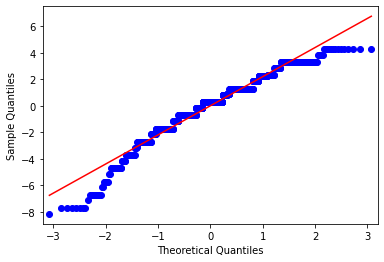

In [31]:
#Q-Q plot for normality
fig4=sm.qqplot(reg3.resid, line='r')

### Standardized Residuals: 

Text(0.5, 0, 'Observation Number')

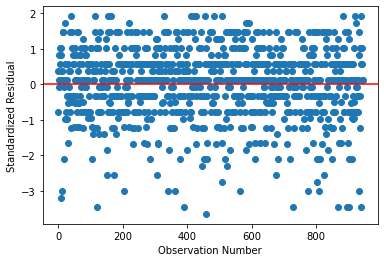

In [40]:
# simple plot of residuals
stdres = pd.DataFrame(reg3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

Figure(432x288)


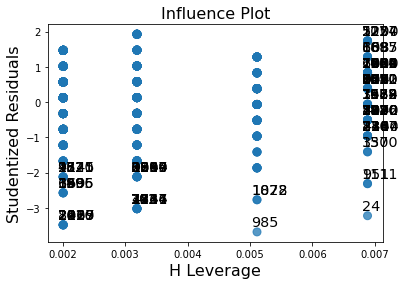

In [37]:
# leverage plot
fig6 = plt.figure(figsize(12,8))
fig5 = sm.graphics.influence_plot(reg3, size=8)
print(fig5)

### Summary:

Some observations from our multilinear regression of Economic Optimism associated with level of education and political affiliation follow. When looking at the association of each explanitory variable with the response variable independently, we see that for level of education: $\beta_0 = 6.799$, $p = 1.87 \times 10^{-11}$. For the association between economic optimism and political affiliation, we see: $\beta_0 = 2.758, $p = 0.00593$. There are significant positive associations between the response variable and each explanatory variable. The Q-Q plot does indeed show that our residuals are fairly normally distributed, but deviate at the higher and lower quintiles. The standard residual plot shows that almost all of our residuals are within two standard deviations of the mean, with none being more than three standard deviations from the mean in the positive direction, and only a few being more than three standard deviations from the mean in the negative direction. Because both of our explanitory variables are dichotomous categorical variables, we don't get as much from the influence plot/ leverage plot as we would like. There don't seem to be any points that are both high leverage and extreme outliers. Using dummy variables to aid our regression over categorical variables rather than dichotomization may be what we need to get the analysis we want. Look forward to that in a future assignment.